In [1]:
import numpy as np
import matplotlib.pyplot as plt


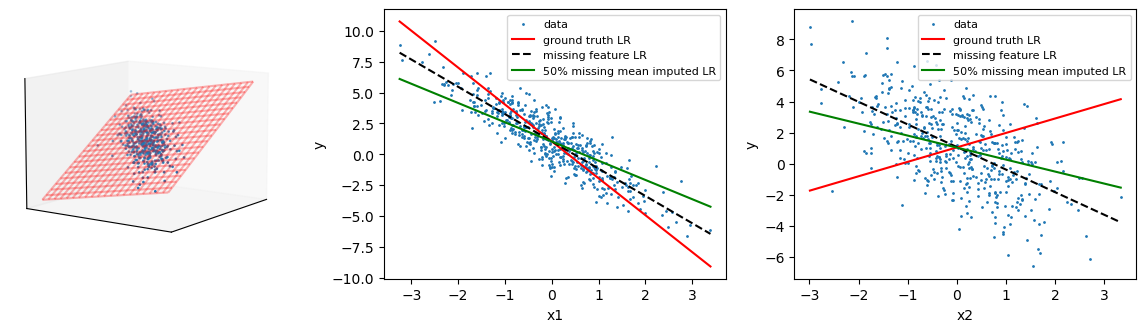

In [275]:
# constants
seed = 101010
n = 500

# data
np.random.seed(seed)
mean = [0, 0]
cov = 0.8
covariance = [[1, cov], [cov, 1]]
X = np.random.multivariate_normal(mean, covariance, n)
B = np.array([-3, 1])
b =  np.array([1])
y = X.dot(B) + b + np.random.normal(0, 1, n)

# linear regression
X_lr = np.c_[np.ones(n), X]
B_hat = np.linalg.inv(X_lr.T.dot(X_lr)).dot(X_lr.T).dot(y)
y_hat = X_lr.dot(B_hat)


# Plot 3 plots (3D, x1, x2)
fig = plt.figure(figsize=(15, 3.5))
for i in range(3):

    if i == 0:
        # plot scatter
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], y, s=1)

        # plot plane
        X1, X2 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 
                                np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
        Y = B_hat[0] + B_hat[1] * X1 + B_hat[2] * X2
        ax.plot_wireframe(X1, X2, Y, rstride=5, cstride=5, color='r', alpha=0.3)
        ax.view_init(azim = 35, elev = 10)

        # disable ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

    else:
        # plot scatter
        ax = fig.add_subplot(1, 3, i + 1)
        ax.scatter(X[:, i-1], y, s=1)

        # plot line
        X_ = np.linspace(X[:, i-1].min(), X[:, i-1].max(), 100)
        Y_ = B_hat[0] + B_hat[i] * X_
        ax.plot(X_, Y_, 'r')

        # plot line if the other feature is completely missing
        X_lr_i = np.c_[np.ones(n), X[:,i%2 - 1]]
        B_hat_i = np.linalg.inv(X_lr_i.T.dot(X_lr_i)).dot(X_lr_i.T).dot(y)

        X_ = np.linspace(X[:, i%2 - 1].min(), X[:, i%2 - 1].max(), 100)
        Y_ = B_hat_i[0] + B_hat_i[1] * X_
        ax.plot(X_, Y_, 'black', linestyle='dashed')

        
        # plot if the other feature has 50% missing and rest is mean imputed
        missing = np.random.choice(n, int(n/2), replace=False)
        X_missing = X.copy()
        X_missing[missing, 0] = np.nan
        X_missing[np.isnan(X_missing)] = np.nanmean(X_missing, axis=0)[0]

        #linear regression
        X_lr_m = np.c_[np.ones(n), X_missing]
        B_hat_m = np.linalg.inv(X_lr_m.T.dot(X_lr_m)).dot(X_lr_m.T).dot(y)

        # plot line
        X_ = np.linspace(X[:, i-1].min(), X[:, i-1].max(), 100)
        Y_ = B_hat_m[0] + B_hat_m[i] * X_
        ax.plot(X_, Y_, 'g')

        # set labels
        ax.set_xlabel('x' + str(i))
        ax.set_ylabel('y')
        plt.legend(['data', 'ground truth LR', 'missing feature LR', '50% missing mean imputed LR'], fontsize=8)

plt.show()